## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

The number of rows in the dataset is 294478.

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
(len(df[df['converted']==1]))/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
treatment_oldpage = df.query('group == "treatment" & landing_page == "old_page"')['group'].count()
control_newpage = df.query('group == "control" & landing_page == "new_page"')['group'].count()
treatment_oldpage + control_newpage

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-14 02:55:59.590927')].index)

In [15]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [17]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
df2.query('landing_page == "new_page"')['user_id'].count()/df2.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**The probability of an individual converting regardless of the page they receive is 11.96%. Given that an individual was in the control group, the probability they converted is 12.04%. Given that an individual was in the treatment group, the probability they converted is 11.88%. The probability that an individual received the new page is 50%.
Since the probability that an individual received the new page is 50% and the probability users in both groups are very similar to probability of an individual converting regardless of the page, there is no evidence that new page leads to more conversions.
**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**

Null Hypothesis H0: p_old >= p_new
  
Alternative hypothesis H1: p_old < p_new

**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

Since we assume under the null hypothesis, p_new has "true" success rate equal to the converted success rate regardless of page, the conversions for each page are the same.

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

Since we assume under the null hypothesis, p_old has "true" success rate equal to the converted success rate regardless of page, the conversions for each page are the same.

c. What is $n_{new}$?

In [23]:
n_new = df2.query('landing_page == "new_page"').user_id.nunique()
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old = df2.query('landing_page == "old_page"').user_id.nunique()
n_old

145274

In [25]:
# p_new - p_old under the null
p_new - p_old

0.0

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice([0,1], n_new, p=[p_new, 1-p_new])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([0,1], n_old, p=[p_old, 1-p_old])
old_page_converted

array([0, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
new_page_converted.mean()-old_page_converted.mean()

9.826675028812293e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [33]:
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], n_new, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([0,1], n_old, p=[p_old, 1-p_old])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   4.,   88.,  546., 1890., 3137., 2708., 1288.,  306.,   29.,
           4.]),
 array([-0.0048293 , -0.00382581, -0.00282233, -0.00181884, -0.00081536,
         0.00018813,  0.00119161,  0.0021951 ,  0.00319858,  0.00420206,
         0.00520555]),
 <a list of 10 Patch objects>)

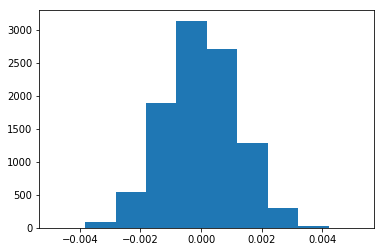

In [34]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
# Compute observed difference in converted rate 
Actual_convert_new = df2.query('landing_page == "new_page"').converted.mean()
Actual_convert_old = df2.query('landing_page == "old_page"').converted.mean()
obs_difference = Actual_convert_new - Actual_convert_old
obs_difference

-0.0015782389853555567

In [39]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

(array([  37.,  163.,  708., 1729., 2772., 2535., 1423.,  514.,   98.,
          21.]),
 array([-0.00423424, -0.0033634 , -0.00249255, -0.00162171, -0.00075087,
         0.00011997,  0.00099081,  0.00186165,  0.00273249,  0.00360333,
         0.00447417]),
 <a list of 10 Patch objects>)

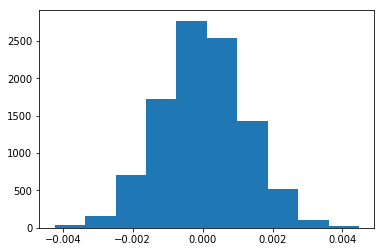

In [40]:
#Plot Null distribution
plt.hist(null_vals)

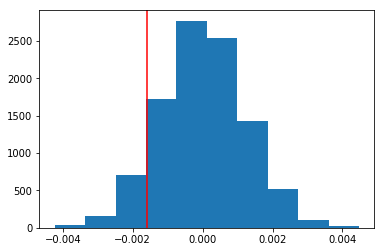

In [43]:
#Plot vertical line for observed statistic
plt.hist(null_vals)
plt.axvline(x=obs_difference,color ='red')

In [46]:
#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals > obs_difference).mean()

0.9041

90.41% of the p_diffs are greater than the actual difference observed in ab_data.csv

In [48]:
# Calculating p-value
(null_vals < obs_difference).mean()

0.0959

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

(Answer): A p-value is the probability of an observed (or more extreme) result assuming that the null hypothesis is true.
Since we have a p-value of 0.0959 which is greater than Type 1 error rate of 0.05, we fail to reject the null. Therefore, we can say there is no difference between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [58]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = df2.query('landing_page == "old_page"').user_id.nunique()
n_new = df2.query('landing_page == "new_page"').user_id.nunique()
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [64]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [68]:
from scipy.stats import norm

norm.cdf(z_score) 
# Tells us how significant our z-score is

0.09494168724097551

In [69]:
norm.ppf(1-(0.05/2))
# Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

(Conclusion):
Before this test began, we would have picked a significance level. Let's just say it's 95%. Since this is a test for the difference, it's a two-tail test so a z-score past -1.959963984540054 or 1.959963984540054 will be significant.

Since the z-score of -1.3109241984234394 doesn't past the critical value of -1.959963984540054, we fail to reject the null hypothesis that the difference between the two proportions is no different from zero. The result agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression, due to the fact that response variable is categorical variable. **

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [70]:
#create a column for the intercept
df2['intercept'] = 1

In [71]:
#create a dummy variable column for which page each user received
page_dummies = pd.get_dummies(df['landing_page'])
df2_new = df2.join(page_dummies)
df2_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


In [72]:
#Add an ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2_new['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [77]:
#create a logistic model
log_mod = sm.Logit(df2_new['converted'], df2_new[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [78]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Jul 2018   Pseudo R-squ.:               8.077e-06
Time:                        22:13:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

** (Answer):

The p-value associated with ab_page is 0.190

Regression model here assumes there is no difference between the treatment and control group unless the treatment group proves to be definitely better. Besides, regression model here has different explanatory variable or factor for the result. 
    
Linear model in Part II assumes that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%   
**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding other factors to a regression model could greatly expand understanding of the relationships among the variables in the model and allows more hypotheses to be tested. However, overfitting a model can also be a real problem. An overfit model can cause the regression coefficients, p-values, and R-squared to be misleading. When there are high correlations between two or more predictor variables, multicollinearity generally occurs and creates redundant information, skewing the results in a regression model. **



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [79]:
df_c = pd.read_csv('countries.csv')
df_c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [80]:
#Join ab dataset with country dataset
df3 = df2_new.merge(df_c, on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [81]:
df_c['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [86]:
df3[['UK','US','CA']] = pd.get_dummies(df3['country'])
df3 = df3.drop('CA', axis=1)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,1,0,US,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,CA,1,0


In [87]:
#Create intercept variable
df3['intercept'] = 1

In [99]:
#Create Logit regression model for conveted and country, and us CA and old page as baseline
logit3 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK','US']])
result3 = logit3.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            3
Date:                Tue, 10 Jul 2018   Pseudo R-squ.:               2.325e-05
Time:                        23:43:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1757
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.760      0.000      -2.007      -1.972
new_page      -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK            -0.0408      0.027     -1.516      0.129      -0.093       0.012
US             0.0099      0.013      0.742      0.458      -0.016       0.036
==============================================================================
"""

In [100]:
np.exp(result3.params)

intercept    0.136798
new_page     0.985152
UK           0.960052
US           1.009921
dtype: float64

In [101]:
1/np.exp(result3.params)

intercept    7.310067
new_page     1.015071
UK           1.041611
US           0.990177
dtype: float64

Interpreting Result:

All have p-values are greater than 0.05 which suggest none of the variables are statistically significant. 

For every unit for new_page decrease, convert will be 1.5% more likely to happen, holding all other varible constant.

For every unit for UK increases, convert is 4.15% more to happen, holding all other varible constant.

For every unit for US increases, convert is 0.99% more to happen, holding all other varible constant.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [97]:
#Create a new intereacton variable between new page and country US and UK
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']

In [98]:
#Create logistic regression for the intereaction variable between new page and country using dummy variable
logit4 = sm.Logit(df3['converted'], df3[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result4 = logit4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290576
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 Jul 2018   Pseudo R-squ.:               3.484e-05
Time:                        23:42:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1917
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9865      0.010   -206.341      0.000      -2.005      -1.968
new_page       -0.0206      0.014     -1.507      0.132      -0.047       0.006
UK_new_page    -0.0469      0.054     -0.871      0.384      -0.152       0.059
US_new_page     0.0314      0.027      1.182      0.237      -0.021       0.084
UK             -0.0176      0.038     -0.466      0.641      -0.091       0.056
US             -0.0058      0.019     -0.307      0.759      -0.043       0.031
===============================================================================
"""

In [102]:
#exponentiated the CV to inteprete the result
np.exp(result4.params)

intercept      0.137181
new_page       0.979625
UK_new_page    0.954219
US_new_page    1.031919
UK             0.982603
US             0.994250
dtype: float64

In [104]:
1/np.exp(result4.params)

intercept      7.289650
new_page       1.020799
UK_new_page    1.047978
US_new_page    0.969068
UK             1.017705
US             1.005783
dtype: float64

Interpreting Result:
 
Only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate. All other variables have p-values are greater than 0.05 which suggest none of the variables are statistically significant.

Therefore, the country a user lives is not a significant facotor on the converted rate.

For every unit for new_page decreases, convert will be 1.02 times more likely to happen, holding all other varible constant.

Convert is 1.047 times more likely to happen for UK and new page users than CA and new page users, holding all other varible constant.

Convert is 1.03 times more likely to happen for US and new page users than CA and new page users, holding all other varible constant.

Convert is 1.7705 % more likely to happen for the users in UK than CA, holding all other varible constant.

Convert is 0.0058 % more likely to happen for the users in US than CA, holding all other varible constant. 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [106]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0